
# CODE TO PERFORM CLASSIFICATION USING K-NEAREST NEIGHBORS
# Dr. Ryan @STEMplicity
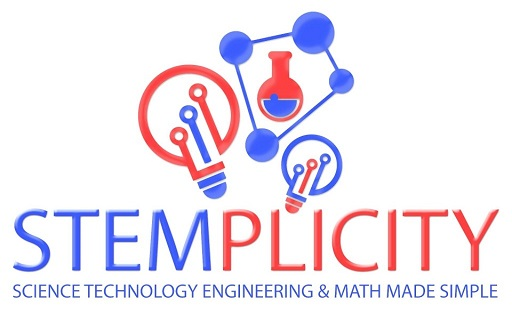



# PROBLEM STATEMENT

You own an online clothing business and you would like to develop a new app (or in-store) feature in which customers would enter their own height and weight and the system would predict what T-shirt size should they wear. Features are height and weight and output is either L (Large) or S (Small). 

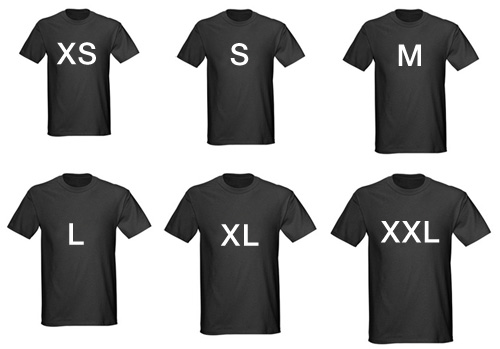

DATA SOURCE: https://www.listendata.com/2017/12/k-nearest-neighbor-step-by-step-tutorial.html

# STEP#0: LIBRARIES IMPORT


In [17]:
# import EDA libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization

# import data cleaner and standardizer libraries
#from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

# import ML (model, improvement and evaluation) libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, cross_val_score

# STEP#1: IMPORT DATASET

In [4]:
Tshirt = pd.read_csv("Tshirt_Sizing_Dataset.csv")

In [5]:
Tshirt.head() # Very small dataset, category is a string! We need encoding

,Height (in cms),Weight (in kgs),T Shirt Size
0,158,58,S
1,158,59,S
2,158,63,S
3,160,59,S
4,160,60,S


In [6]:
Tshirt.tail()

,Height (in cms),Weight (in kgs),T Shirt Size
13,168,63,L
14,168,66,L
15,170,63,L
16,170,64,L
17,170,68,L


In [7]:
Tshirt.info() # No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Height (in cms)  18 non-null     int64 
 1   Weight (in kgs)  18 non-null     int64 
 2   T Shirt Size     18 non-null     object
dtypes: int64(2), object(1)
memory usage: 560.0+ bytes


In [8]:
Tshirt.describe() # Difference in magnitude. Standardize!

,Height (in cms),Weight (in kgs)
count,18.00000,18.000000
mean,164.00000,62.333333
std,4.32503,2.634611
min,158.00000,58.000000
25%,160.00000,60.250000
50%,164.00000,62.500000
75%,168.00000,64.000000
max,170.00000,68.000000


In [9]:
Tshirt.describe(include='O') # Only 2 unique labels. We only need LabelEncoder

,T Shirt Size
count,18
unique,2
top,L
freq,11


In [10]:
Tshirt["T Shirt Size"].value_counts() # Small discrepancy but also small dataset. Try oversampling!

L    11
S     7
Name: T Shirt Size, dtype: int64

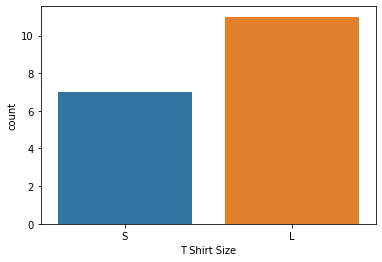

In [12]:
sns.countplot(Tshirt['T Shirt Size'], label = "Count")
plt.show()

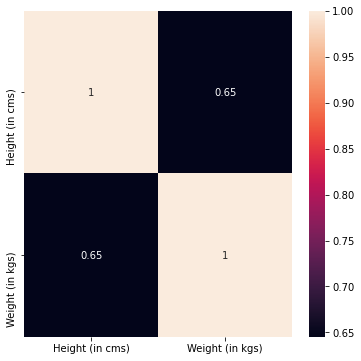

In [27]:
# Let's check the correlation between the variables 
# Strong correlation between the mean radius and mean perimeter, mean area and mean primeter
plt.figure(figsize=(6,6)) 
sns.heatmap(Tshirt.corr(), annot=True)
plt.show()

# STEP#2: CREATE TESTING AND TRAINING DATASET

In [ ]:
# First we will build the model with nothing and just improve on it

In [13]:
X = Tshirt.iloc[:, 0:2].values
X

array([[158,  58],
       [158,  59],
       [158,  63],
       [160,  59],
       [160,  60],
       [163,  60],
       [163,  61],
       [160,  64],
       [163,  64],
       [165,  61],
       [165,  62],
       [165,  65],
       [168,  62],
       [168,  63],
       [168,  66],
       [170,  63],
       [170,  64],
       [170,  68]], dtype=int64)

In [14]:
y = Tshirt.iloc[:, 2].values
y

array(['S', 'S', 'S', 'S', 'S', 'S', 'S', 'L', 'L', 'L', 'L', 'L', 'L',
       'L', 'L', 'L', 'L', 'L'], dtype=object)

In [18]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [19]:
y

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [38]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13, 2)
(13,)
(5, 2)
(5,)


In [21]:
# Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

# STEP#3: MODEL TRAINING

In [22]:
# Fitting K-NN to the Training set
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) # Default values
classifier.fit(X_train, y_train)

KNeighborsClassifier()

# STEP#4: MODEL TESTING

In [23]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 0, 0, 1])

In [24]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

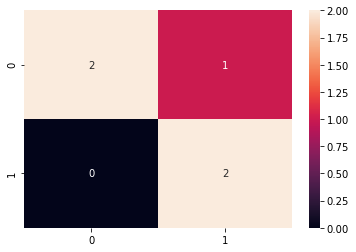

In [26]:
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.67      1.00      0.80         2

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



In [50]:
# K-Fold Cross Validation (VERY SMALL DATASET. NOT RECOMMENDED TO SPLIT THE DATA EVEN FURTHER!!!)
# accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5) # 10-fold will not work
# The least populated class in y has only 5 members, which is less than n_splits=10

# print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
# print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

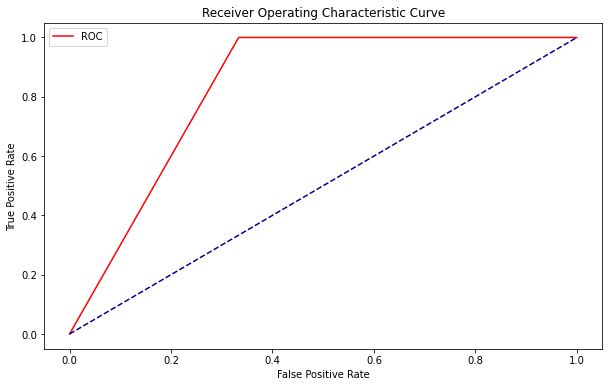

In [51]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,color='red',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.show()

# STEP#5: TESTING RESULTS VISUALIZATION

# VISUALIZE TRAINING SET RESULTS

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


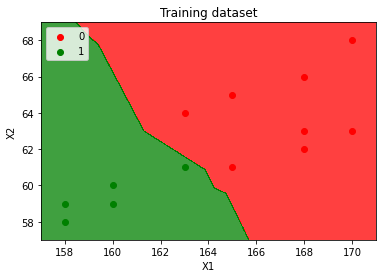

In [52]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_grid, y_grid = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_grid[:, 0].min() - 1, stop = X_grid[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_grid[:, 1].min() - 1, stop = X_grid[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Training dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

# VISUALIZE TEST SET RESULTS

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


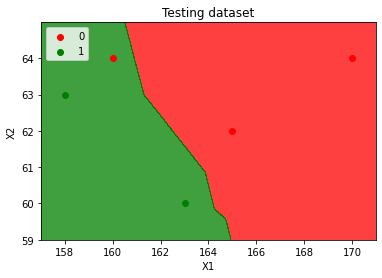

In [53]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_grid, y_grid = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_grid[:, 0].min() - 1, stop = X_grid[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_grid[:, 1].min() - 1, stop = X_grid[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Testing dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

# EXCELLENT JOB! NOW YOU'VE BECOME EXPERT IN K NEAREST NEIGHBORS, YOU SHOULD BE READY FOR EXERCISES :)

In [54]:
# 1st iteration - F1 Score = 0.80

# Now let's try with

# 1. Feature Scaling
# 2. Oversampling
# 3. Both
# 4. With Grid Searching

In [80]:
# 1. Feature Scaling

X = Tshirt.iloc[:, 0:2].values
y = Tshirt.iloc[:, 2].values
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X, y, test_size=0.25)

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train_scaled)
X_test_scaled = sc.transform(X_test_scaled)

# Fitting K-NN to the Training set
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) # Default values
classifier.fit(X_train_scaled, y_train_scaled)

# Predicting the Test set results
y_pred_scaled = classifier.predict(X_test_scaled)
y_pred_scaled

print(classification_report(y_test_scaled, y_pred_scaled))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



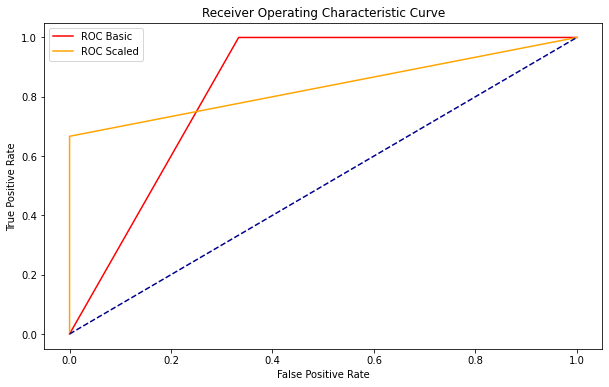

In [81]:
fpr_scaled,tpr_scaled,thresholds_scaled = roc_curve(y_test_scaled,y_pred_scaled)

plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,color='red',label='ROC Basic')
plt.plot(fpr_scaled,tpr_scaled,color='orange',label='ROC Scaled')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.show()

In [ ]:
# On such a small dataset, scaling has a detrimental effect in the model understanding the data!

In [97]:
# 2. Oversampling

X = Tshirt.iloc[:, 0:2].values
y = Tshirt.iloc[:, 2].values
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

# Oversampling
ovs = RandomOverSampler(random_state=0)
X,y = ovs.fit_resample(X,y)

X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X, y, test_size=0.25)

#sc = StandardScaler()
#X_train_over = sc.fit_transform(X_train_over)
#X_test_over = sc.transform(X_test_over)

# Fitting K-NN to the Training set
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) # Default values
classifier.fit(X_train_over, y_train_over)

# Predicting the Test set results
y_pred_over = classifier.predict(X_test_over)
y_pred_over

print(classification_report(y_test_over, y_pred_over))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



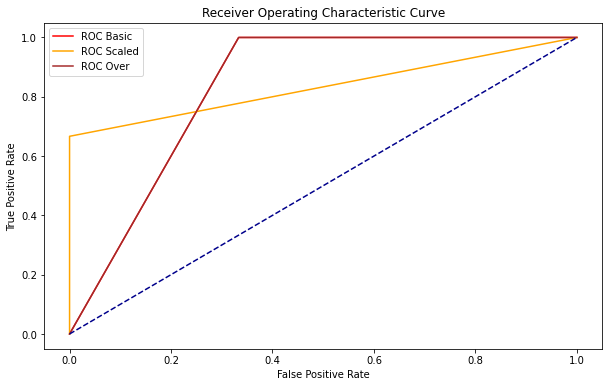

In [98]:
fpr_over,tpr_over,thresholds_over = roc_curve(y_test_over,y_pred_over)

plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,color='red',label='ROC Basic')
plt.plot(fpr_scaled,tpr_scaled,color='orange',label='ROC Scaled')
plt.plot(fpr_over,tpr_over,color='brown',label='ROC Over')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.show()

In [ ]:
# On such a small dataset, oversampling a few rows has no real effect in the model understanding the data!

In [107]:
# 3. Both

X = Tshirt.iloc[:, 0:2].values
y = Tshirt.iloc[:, 2].values
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

# Oversampling
ovs = RandomOverSampler(random_state=0)
X,y = ovs.fit_resample(X,y)

X_train_both, X_test_both, y_train_both, y_test_both = train_test_split(X, y, test_size=0.25)

sc = StandardScaler()
X_train_both = sc.fit_transform(X_train_both)
X_test_both = sc.transform(X_test_both)

# Fitting K-NN to the Training set
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) # Default values
classifier.fit(X_train_both, y_train_both)

# Predicting the Test set results
y_pred_both = classifier.predict(X_test_both)
y_pred_both

print(classification_report(y_test_both, y_pred_both))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.67      1.00      0.80         2

    accuracy                           0.83         6
   macro avg       0.83      0.88      0.83         6
weighted avg       0.89      0.83      0.84         6



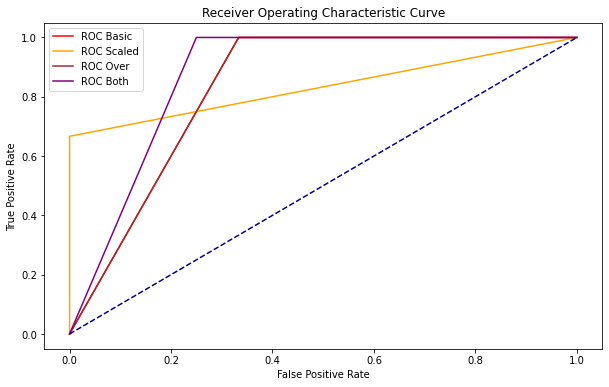

In [108]:
fpr_both,tpr_both,thresholds_both = roc_curve(y_test_both,y_pred_both)

plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,color='red',label='ROC Basic')
plt.plot(fpr_scaled,tpr_scaled,color='orange',label='ROC Scaled')
plt.plot(fpr_over,tpr_over,color='brown',label='ROC Over')
plt.plot(fpr_both,tpr_both,color='purple',label='ROC Both')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.show()

In [ ]:
# A slightly better model, but it has tremendous variance, due to, AGAIN, low amount of data!

In [109]:
# 4. Grid Search
k_range = list(range(1, 11))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)

# instantiate the grid
grid = GridSearchCV(classifier, param_grid, cv=10, scoring='accuracy')

# fit the grid with data
grid.fit(X, y)

# examine the best model
# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.9666666666666666
{'n_neighbors': 2, 'weights': 'uniform'}
KNeighborsClassifier(n_neighbors=2)


In [122]:
X = Tshirt.iloc[:, 0:2].values
y = Tshirt.iloc[:, 2].values
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

# Oversampling
ovs = RandomOverSampler(random_state=0)
X,y = ovs.fit_resample(X,y)

X_train_grid, X_test_grid, y_train_grid, y_test_grid = train_test_split(X, y, test_size=0.25)

sc = StandardScaler()
X_train_grid = sc.fit_transform(X_train_grid)
X_test_grid = sc.transform(X_test_grid)

# Fitting K-NN to the Training set
classifier = KNeighborsClassifier(n_neighbors = 2, weights = 'uniform', metric = 'minkowski', p = 2)
classifier.fit(X_train_grid, y_train_grid)

# Predicting the Test set results
y_pred_grid = classifier.predict(X_test_grid)
y_pred_grid

print(classification_report(y_test_grid, y_pred_grid))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



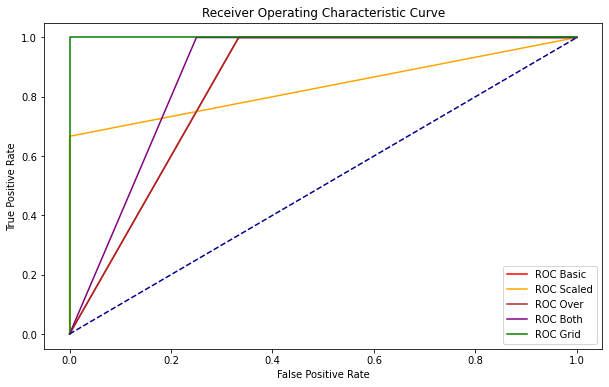

In [123]:
fpr_grid,tpr_grid,thresholds_grid = roc_curve(y_test_grid,y_pred_grid)

plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,color='red',label='ROC Basic')
plt.plot(fpr_scaled,tpr_scaled,color='orange',label='ROC Scaled')
plt.plot(fpr_over,tpr_over,color='brown',label='ROC Over')
plt.plot(fpr_both,tpr_both,color='purple',label='ROC Both')
plt.plot(fpr_grid,tpr_grid,color='green',label='ROC Grid')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.show()

In [ ]:
# 100% is irrealistic. This is only due to the small amount of data.
# However, it was the model that showed the least amount of variance when run multiple times.